Autoencoders = unsupervised technique. 
They work well with data in a small range, so need to be rescaled to [0,1]

In [1]:
import keras
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(keras.__version__)

2.4.3


In [4]:
IMAGE_FEATURES = 28 * 28

In [9]:
# extract data from gzip files
def extract_data(filename,num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_FEATURES * num_images)
        
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_FEATURES)
        
        return data

In [10]:
# dataset source: https://github.com/zalandoresearch/fashion-mnist
train = extract_data("dataset/train-images-idx3-ubyte.gz",60000)
test = extract_data("dataset/t10k-images-idx3-ubyte.gz",1000)

In [12]:
train.shape, test.shape
# every image is 28 x 28 pixels = 784

((60000, 784), (1000, 784))

In [13]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
  }

In [18]:
# load a single image
def display_image(image_pixels):
    plt.imshow(image_pixels.reshape(28,28),cmap="gray")

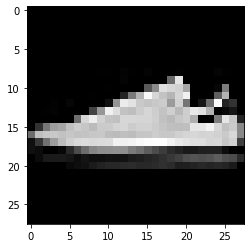

In [21]:
display_image(train[6])

In [22]:
train.dtype

dtype('float32')

In [23]:
# look at range of pixel values
np.max(train),np.max(test)

(255.0, 255.0)

## Autoencoders work well with data in a small range, so need to be rescaled to [0,1]


In [24]:
train = train/np.max(train)
test = test/np.max(test)

In [25]:
np.max(train),np.max(test)

(1.0, 1.0)

## start building the NN model

In [27]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Dense

In [41]:
batch_size = 128
epochs=3

input_img = Input(shape=(IMAGE_FEATURES,)) # input is fed into a dense layer, so every input is in the form of a 1D feature vector


In [31]:
def autoencoder(input_img):
    encoding1 = Dense(784,activation='relu')(input_img)
    encoding2 = Dense(256,activation='relu')(encoding1)
    
    codings = Dense(64,activation='relu')(encoding2)
    
    decoding2 = Dense(256,activation='relu')(codings)
    decoding1 = Dense(784,activation='relu')(decoding2)
    
    return decoding1

In [32]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error',optimizer=Adam())

In [33]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               201488    
Total params: 1,050,976
Trainable params: 1,050,976
Non-trainable params: 0
___________________________________________________

In [42]:
model_train = autoencoder.fit(train,
                             train,
                             batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data = (train,train))

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0197 - val_loss: 0.0181
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0174 - val_loss: 0.0172
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0162 - val_loss: 0.0154
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0153 - val_loss: 0.0150
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0148 - val_loss: 0.0143


In [36]:
pred = autoencoder.predict(test)

In [37]:
pred.shape

(1000, 784)

## Visualise autoencoding

Original


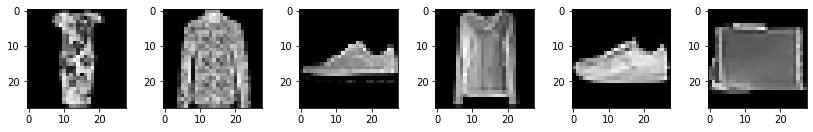

Post Autoencoder


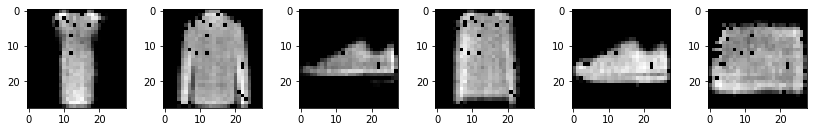

In [43]:
plt.figure(figsize=(24,4))
print("Original")

pos = 0
for i in range(100,106):
    plt.subplot(2,10,pos+1)
    
    img = test[i].reshape(28,28)
    plt.imshow(img, cmap='gray')
    pos +=1
plt.show()



plt.figure(figsize=(24,4))
print("Post Autoencoder")
pos = 0
for i in range(100,106):
    plt.subplot(2,10,pos+1)
    
    img = pred[i].reshape(28,28)
    plt.imshow(img, cmap='gray')
    pos +=1
plt.show()